# Bayesian Machine Learning

### Preliminaries

- Goals
  - Introduction to Bayesian (i.e., probabilistic) modeling
- Materials
  - Mandatory
    - These lecture notes
  - Optional
    - Bishop pp. 21-24   

### Example Problem: Predicting a Coin Toss

- **Question**. We observe a the following sequence of heads (h) and tails (t) when tossing the same coin repeatedly $$D=\{hthhtth\}\,.$$

- What is the probability that heads (h) comes up next?

- **Answer** later in this lecture. 

### The Bayesian Machine Learning Framework

- Suppose that your task is to predict a 'new' datum $x$, based on $N$  observations $D=\{x_1,\dotsc,x_N\}$.

- The Bayesian approach for this task involves three stages: 
  1. Model specification
  1. parameter estimation (inference, learning)
  1. Prediction (apply the model)

  
- Next, we discuss these three stages in a bit more detail.

### (1) Model specification

Your first task is to propose a model with tuning parameters $\theta$ for generating the data $D$.

- This involves specification of $p(D|\theta)$ and a prior for the parameters $p(\theta)$.

- _You_ choose the distribution $p(D|\theta)$ based on your physical understanding of the data generating process.
    - Note that, for independent observations $x_n$,
$$ p(D|\theta) = \prod_{n=1}^N p(x_n|\theta)$$
so usually you select a model for generating one observation $x_n$ and then use (in-)dependence assumptions to combine these models into a model for $D$. 

- _You_ choose the prior $p(\theta)$ to reflect what you know about the parameter values before you see the data $D$.
  

### (2) Parameter estimation

- After model specification, you need to measure/collect a data set $D$. Then, use Bayes rule to find the posterior distribution for the parameters,
$$
p(\theta|D) = \frac{p(D|\theta) p(\theta)}{p(D)} \propto p(D|\theta) p(\theta)
$$  

- Note that there's **no need for you to design a _smart_ parameter estimation algorithm**. The only complexity lies in the computational issues.  

- This "recipe" works only if the RHS factors can be evaluated; this is what machine learning is about     
  $\Rightarrow$ **Machine learning is easy, apart from computational details:)**
  

### (3) Prediction

- Given the data $D$, our knowledge about the yet unobserved datum $x$ is captured by
$$\begin{align*}
p(x|D) &= \int p(x,\theta|D) \,\mathrm{d}\theta\\
 &= \int p(x|\theta,D) p(\theta|D) \,\mathrm{d}\theta\\
 &= \int p(x|\theta) p(\theta|D) \,\mathrm{d}\theta\\
\end{align*}$$

- Again, **no need to invent a special prediction algorithm**. Probability theory takes care of all that. The complexity of prediction is just computational: how to carry out the marginalization over $\theta$.

- In order to execute prediction, you need to have access to the factors $p(x|\theta)$ and $p(\theta|D)$. Where do these factors come from? Are they available?
  

- What did we learn from $D$? Without access to $D$, we would predict new observations through
$$
p(x) = \int p(x,\theta) \,\mathrm{d}\theta = \int p(x|\theta) p(\theta) \,\mathrm{d}\theta
$$

- NB The application of the learned posterior $p(\theta|D)$ not necessarily has to be prediction. We use it here as an example, but other applications are of course also possible. 
  

###  Bayesian Model Comparison 

- There appears to be a remaining problem: How good really were our model assumptions $p(x|\theta)$ and $p(\theta)$?  

- Technically, this is a **model comparison** problem

- [**Q**.] What if I have more candidate models, say $\mathcal{M} = \{m_1,\ldots,m_K\}$ where each model relates to specific prior $p(\theta|m_k)$ and likelihood $p(D|\theta,m_k)$? Can we evaluate the relative performance of a model against another model from the set?

- [**A**.]: Start again with **model specification**. Specify a prior $p(m_k)$ for each of the models and then solve the desired inference problem:      
$$\begin{align*} 
p(m_k|D) &= \frac{p(D|m_k) p(m_k)}{p(D)} \\
  &\propto p(m_k) \cdot p(D|m_k) \\
  &= p(m_k)\cdot \int_\theta p(D,\theta|m_k) \,\mathrm{d}\theta\\
  &= \underbrace{p(m_k)}_{\substack{\text{model}\\\text{prior}}}\cdot \int_\theta \underbrace{p(D|\theta,m_k)}_{\text{likelihood}} \,\underbrace{p(\theta|m_k)}_{\text{prior}}\, \mathrm{d}\theta\\
\end{align*}$$

### Bayesian Model Comparison (continued) 

- You, the engineer, have to choose the factors $p(D|\theta,m_k)$, $p(\theta|m_k)$ and $p(m_k)$. After that, for a given data set $D$, the model posterior $p(m_k|D)$ can be computed. 

- If you need to work with one model,select the model with largest posterior $p(m_k|D)$

- Alternatively, if you don't want to choose a model, you can do prediction by **Bayesian model averaging** to utilitize the predictive power from all models:
$$\begin{align*}
p(x|D) &= \sum_k \int p(x,\theta,m_k|D)\,\mathrm{d}\theta \\
  &= \sum_k \underbrace{p(m_k|D)}_{\substack{\text{model}\\\text{posterior}}} \cdot \int \underbrace{p(\theta|D)}_{\substack{\text{parameter}\\\text{posterior}}} \, \underbrace{p(x|\theta,m_k)}_{\text{likelihood}} \,\mathrm{d}\theta
\end{align*}$$ 

- $\Rightarrow$ In a Bayesian framework, **model comparison** follows the same recipe as parameter estimation; it just works at one higher hierarchical level.

- More on this in part 2 (Tjalkens).  

### Machine Learning and the Scientific Method Revisited

- Bayesian probability theory provides a unified framework for information processing (and even the Scientific Method).

<img src="./figures/ml-and-scientific-loop-2.png" width="450px">

### Now Solve the Example Problem: Predicting a Coin Toss

- We observe a the following sequence of heads (h) and tails (t) when tossing the same coin repeatedly $$D=\{hthhtth\}\,.$$

- What is the probability that heads (h) comes up next? We solve this in the next slides ...

### Coin toss example (1): Model Specification

We observe a sequence of $N$ coin tosses $D=\{x_1,\ldots,x_N\}$ with $n$ heads. 

##### Likelihood
- Assume a Bernoulli distributed variable $p(x_k=h|\mu)=\mu$, which leads to a **binomial** distribution for the likelihood (assume $n$ times heads were thrown):
$$   
p(D|\mu) = \prod_{k=1}^N p(x_k|\mu) = \mu^n (1-\mu)^{N-n}
$$

##### Prior
-  Assume the prior belief is governed by a **beta distribution**
$$
p(\mu) = \mathcal{B}(\mu|\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} \mu^{\alpha-1}(1-\mu)^{\beta-1}
$$
<!---  - The Gamma function is sort of a generalized factorial function. If $\alpha,\beta$ are integers, then $\frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)(\Gamma(\beta)} = \frac{(\alpha+\beta-1)!}{(\alpha-1)!\,(\beta-1)!}$
---> 

- The Beta distribution is a **conjugate prior** for the Binomial distribution, which means that 
$$
\text{beta} \propto \text{binomial} \times \text{beta}
$$

- $\alpha$ and $\beta$ are called **hyperparameters**, since they parameterize the distribution for another parameter ($\mu$). E.g., $\alpha=\beta=1$ (uniform).
  

### Coin toss example (2): Parameter estimation

- Infer posterior PDF over $\mu$ through Bayes rule

$$\begin{align*}
p(\mu|D) &\propto p(D|\mu)\,p(\mu|\alpha,\beta)  \\ 
        &= \mu^n (1-\mu)^{N-n} \times \mu^{\alpha-1} (1-\mu)^{\beta-1} \\
        &= \mu^{n+\alpha-1} (1-\mu)^{N-n+\beta-1} 
\end{align*}$$

hence the posterior is also beta distributed as

$$
p(\mu|D) = \mathcal{B}(\mu|\,n+\alpha, N-n+\beta)
$$

- Essentially, **here ends the machine learning activity**

### Coin Toss Example (3): Prediction

- Now, we want to **use** the trained model. Let's use it to predict future observations. 

- Marginalize over the parameter posterior to get the predictive PDF for a new coin toss $x_\bullet$, given the data $D$,

$$\begin{align*}
p(x_\bullet=h|D)  &= \int_0^1 p(x_\bullet=h|\mu)\,p(\mu|D) \,\mathrm{d}\mu \\
  &= \int_0^1 \mu \times  \mathcal{B}(\mu|\,n+\alpha, N-n+\beta) \,\mathrm{d}\mu  \\
  &= \frac{n+\alpha}{N+\alpha+\beta} \qquad \mbox{(a.k.a. Laplace rule)}\hfill
\end{align*}$$

- Finally, we're ready to solve our example problem: for $D=\{hthhtth\}$ and uniform prior ($\alpha=\beta=1$), we get

$$ p(x_\bullet=h|D)=\frac{n+1}{N+2} = \frac{4+1}{7+2} = \frac{5}{9}$$
 

### Coin Toss Example: What did we learn?

- What did we learn from the data? Before seeing any data, we think that $$p(x_\bullet=h)=\left. p(x_\bullet=h|D) \right|_{n=N=0} = \frac{\alpha}{\alpha + \beta}\,.$$ 

- After the $N$ coin tosses, we think that $p(x_\bullet=h|D) = \frac{n+\alpha}{N+\alpha+\beta}$.

- Note the following decomposition

$$\begin{align*}
    p(x_\bullet=h|\,D) &= \frac{n+\alpha}{N+\alpha+\beta} = \frac{n}{N+\alpha+\beta} + \frac{\alpha}{N+\alpha+\beta} \\
        &= \frac{N}{N+\alpha+\beta}\cdot \frac{n}{N} + \frac{\alpha+\beta}{N+\alpha+\beta} \cdot \frac{\alpha}{\alpha+\beta} \\
        &= \underbrace{\frac{\alpha}{\alpha+\beta}}_{prior} + \underbrace{\frac{N}{N+\alpha+\beta}}_{gain}\cdot \big( \underbrace{\frac{n}{N}}_{MLE} - \underbrace{\frac{\alpha}{\alpha+\beta}}_{prior} \big)
\end{align*}$$

- Note that, since $0\leq\text{gain}\lt 1$, the Bayesian estimate lies between prior and maximum likelihood estimate.

- For large $N$, the gain goes to $1$ and $p(x_\bullet=h|D)$ goes to the maximum likelihood estimate (the relative frequency) $n/N$.

#### CODE EXAMPLE

**Bayesian evolution of $p(\mu|D)$ for the coin toss**

Let's see how $p(\mu|D)$ evolves as we increase the number of coin tosses $N$. We'll use two different priors to demonstrate the effect of the prior on the posterior (set $N=0$ to inspect the prior).

Widget{:manipulate,Any}(OrderedDict{Symbol,Any}(:N=>Widget{:slider,Int64}(OrderedDict{Symbol,Any}(:changes=>Observable{Int64}("ob_14", 0, Any[SyncCallback(Scope("knockout-component-6b4fbbc1-17a1-4e24-8837-be967f2f17fb", Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["N"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"text-align:right;width:18%")), 2), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>192,:min=>0,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: value, valueUpdate: 'input', event: {change : function () {this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"flex-grow:1; margin: 0 2%")), 1), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: value")), 0)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"width:18%")), 1)], Dict{Symbol,Any}(:attributes=>Dict("style"=>"display:flex; justify-content:center; align-items:center;")), 7), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64}(#= circular reference @-6 =#), nothing),"value"=>(Observable{Int64}("ob_13", 96, Any[SyncCallback(Scope(#= circular reference @-6 =#), SyncCallback(Scope(#= circular reference @-7 =#), ##40#42{Scope,String}(Scope(#= circular reference @-8 =#), "value"))), #g#15{##16#17{##23#26,Observable{Any}},Tuple{Observable{Int64}}}(##16#17{##23#26,Observable{Any}}(##23#26(), Observable{Any}("ob_15", Figure(PyObject <Figure size 640x480 with 1 Axes>), Any[])), (Observable{Int64}(#= circular reference @-4 =#),))]), nothing)), Set(String[]), nothing, Any["knockout"=>"/Users/isenoz/.julia/packages/Knockout/JIqpG/src/../assets/knockout.js", "knockout_punches"=>"/Users/isenoz/.julia/packages/Knockout/JIqpG/src/../assets/knockout_punches.js", "/Users/isenoz/.julia/packages/InteractBase/Q4IkI/src/../assets/all.js", "/Users/isenoz/.julia/packages/InteractBase/Q4IkI/src/../assets/style.css", "/Users/isenoz/.julia/packages/InteractBulma/Ohu5Y/src/../assets/main.css"], Dict{Any,Any}("_promises"=>Dict{Any,Any}("importsLoaded"=>Any[JSString("function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init : function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            })\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            })\n            ko.applyBindingsToNode(element, { value: stringified, valueUpdate: allBindings.get('valueUpdate')}, context);\n        }\n    };\n    var json_data = JSON.parse(\"{\\\"changes\\\":0,\\\"value\\\":96}\");\n    var self = this;\n    function AppViewModel() {\n        for (var key in json_data) {\n            var el = json_data[key];\n            this[key] = Array.isArray(el) ? ko.observableArray(el) : ko.observable(el);\n        }\n        \n        \n        [this[\"changes\"].subscribe((function (val){!(this.valueFromJulia[\"changes\"]) ? (WebIO.setval({\"name\":\"changes\",\"scope\":\"knockout-component-6b4fbbc1-17a1-4e24-8837-be967f2f17fb\",\"id\":\"ob_14\",\"type\":\"observable\"},val)) : undefined; return this.valueFromJulia[\"changes\"]=f
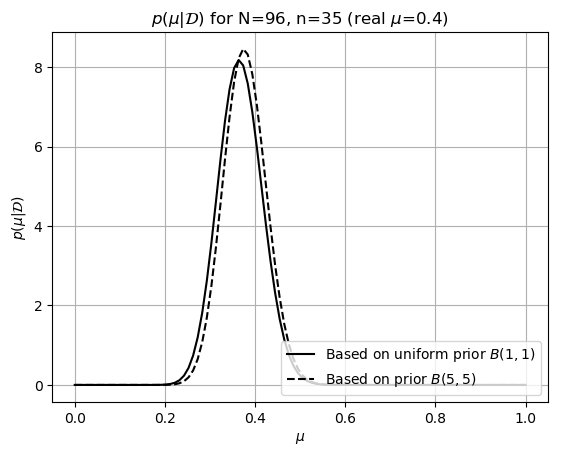
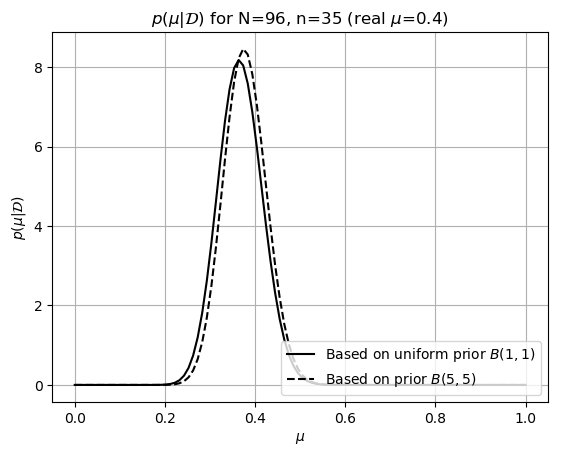

In [9]:
using Reactive, Interact, PyPlot, Distributions
f = figure()
range_grid = range(0.0, stop=1.0, length=100)
μ = 0.4
samples = rand(192) .<= μ # Flip 192 coins
@manipulate for N=0:1:192; withfig(f) do
        n = sum(samples[1:N]) # Count number of heads in first N flips
        posterior1 = Beta(1+n, 1+(N-n))
        posterior2 = Beta(5+n, 5+(N-n))
        plot(range_grid, pdf.(posterior1,range_grid), "k-")
        plot(range_grid, pdf.(posterior2,range_grid), "k--")
        xlabel(L"\mu"); ylabel(L"p(\mu|\mathcal{D})"); grid()
        title(L"p(\mu|\mathcal{D})"*" for N=$(N), n=$(n) (real \$\\mu\$=$(μ))")
        legend(["Based on uniform prior "*L"B(1,1)","Based on prior "*L"B(5,5)"], loc=4)
    end
end

$\Rightarrow$ With more data, the relevance of the prior diminishes!


### From Posterior to Point-Estimate

- Sometimes we want just one 'best' parameter (vector), rather than a posterior distribution over parameters. Why?

- Recall Bayesian prediction

$$
p(x|D) = \int p(x|\theta)p(\theta|D)\,\mathrm{d}{\theta}
$$

- If we approximate posterior $p(\theta|D)$ by a delta function for one 'best' value $\hat\theta$, then the predictive distribution collapses to

$$
p(x|D)= \int p(x|\theta)\,\delta(\theta-\hat\theta)\,\mathrm{d}{\theta} = p(x|\hat\theta)
$$

- This is the model $p(x|\theta)$ evaluated at $\theta=\hat\theta$.

- Note that $p(x|\hat\theta)$ is much easier to evaluate than the integral for full Bayesian prediction.

### Some Well-known Point-Estimates

- **Bayes estimate**

$$
\hat \theta_{bayes}  = \int \theta \, p\left( \theta |D \right)
\,\mathrm{d}{\theta}
$$
  - (homework). Proof that the Bayes estimate minimizes the expected mean-square error, i.e., proof that

$$
\hat \theta_{bayes} = \arg\min_{\hat \theta} \int_\theta (\hat \theta -\theta)^2 p \left( \theta |D \right) \,\mathrm{d}{\theta}
$$

- **Maximum A Posteriori** (MAP) estimate 
$$
\hat \theta_{\text{map}}=  \arg\max _{\theta} p\left( \theta |D \right) =
\arg \max_{\theta}  p\left(D |\theta \right) \, p\left(\theta \right)
$$

- **Maximum Likelihood** (ML) estimate
$$
\hat \theta_{ml}  = \arg \max_{\theta}  p\left(D |\theta\right)
$$
  - Note that Maximum Likelihood is MAP with uniform prior

### Bayesian vs Maximum Likelihood Learning

Consider the task: predict a datum $x$ from an observed data set $D$.

<table>
<tr><td></td><td style="text-align:center"> <b>Bayesian</b></td><td style="text-align:center"> <b>Maximum Likelihood </b></td></tr>
<tr><td>1. <b>Model Specification</b></td><td>Choose a model $m$ with data generating distribution $p(x|\theta,m)$ and parameter prior $p(\theta|m)$</td><td>Choose a model $m$ with same data generating distribution $p(x|\theta,m)$. No need for priors.</td></tr>
<tr><td>2. <b>Learning</b></td><td>use Bayes rule to find the parameter posterior,
$$
p(\theta|D) = \propto p(D|\theta) p(\theta)
$$  </td><td>By Maximum Likelihood (ML) optimization,
$$ 
    \hat \theta  = \arg \max_{\theta}  p(D |\theta)
$$</td></tr>
<tr><td>3. <b>Prediction</b></td><td>$$
p(x|D) = \int p(x|\theta) p(\theta|D) \,\mathrm{d}\theta
$$</td><td>
$$ 
    p(x|D) =  p(x|\hat\theta)
$$</td></tr>
</table>

### Report Card on Maximum Likelihood Estimation

- Maximum Likelihood (ML) is MAP with uniform prior, or MAP is 'penalized' ML
$$
\hat \theta_{map}  = \arg \max _\theta  \{ \overbrace{\log
p\left( D|\theta  \right)}^{\mbox{log-likelihood}} + \overbrace{\log
p\left( \theta \right)}^{\mbox{penalty}} \}
$$

- (good!). Works rather well if we have a lot of data because the influence of the prior diminishes with more data.

- (bad). Cannot be used for model comparison. E.g. best model does generally not correspond to largest likelihood (see part-2, Tjalkens).

- (good). Computationally often do-able. Useful fact (since $\log$ is monotonously increasing):
$$\arg\max_\theta \log p(D|\theta) =  \arg\max_\theta p(D|\theta)$$

$\Rightarrow$ **ML estimation is an approximation to Bayesian learning**, but for good reason a very popular learning method when faced with lots of available data.

---
The cell below loads the style file

In [2]:
open("../../styles/aipstyle.html") do f display("text/html", readstring(f)) end

<!--
This HTML file contains custom styles and some javascript.
Include it a Jupyter notebook for improved rendering.
-->

<!-- Fonts -->
 
 
 
 
 

<!-- Custom style -->


<!-- MathJax styling -->

┌ Warning: `readstring(s::IO)` is deprecated, use `read(s, String)` instead.
│   caller = #3 at In[2]:1 [inlined]
└ @ Core ./In[2]:1
